# **Anime recommendation Project**


# **Explore Data**
- Data visualization
- Data cleansing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from sklearn.metrics import f1_score, classification_report,confusion_matrix

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/animes.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/profiles.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/reviews.csv')

In [ ]:
print('anime shape:',df1.shape)
print('profile shape:', df2.shape)
print('reviews shape:', df3.shape)

anime shape: (19311, 12)
profile shape: (81727, 5)
reviews shape: (192112, 7)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   profile          81727 non-null  object
 1   gender           53856 non-null  object
 2   birthday         46807 non-null  object
 3   favorites_anime  81727 non-null  object
 4   link             81727 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


In [ ]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19306     True
19307     True
19308     True
19309     True
19310     True
Length: 19311, dtype: bool

In [ ]:
df2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
81722     True
81723     True
81724     True
81725     True
81726     True
Length: 81727, dtype: bool

In [ ]:
df3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
192107     True
192108     True
192109     True
192110     True
192111     True
Length: 192112, dtype: bool

In [ ]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()
print('anime shape:',df1.shape)
print('profile shape:', df2.shape)
print('reviews shape:', df3.shape)

anime shape: (16368, 12)
profile shape: (47902, 5)
reviews shape: (130519, 7)


In [ ]:
df1.head(5)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [ ]:
df2.head(5)

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [ ]:
df3.head(5)

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [ ]:
df1.isnull().sum()

uid              0
title            0
synopsis       785
genre            0
aired            0
episodes       543
members          0
popularity       0
ranked        1757
score          404
img_url        166
link             0
dtype: int64

In [ ]:
df2.isnull().sum()

profile                0
gender             17012
birthday           21043
favorites_anime        0
link                   0
dtype: int64

In [ ]:
df3.isnull().sum()

uid          0
profile      0
anime_uid    0
text         0
score        0
scores       0
link         0
dtype: int64

In [ ]:
gender_split = pd.DataFrame(df2.gender.value_counts())
gender_split.reset_index(level=0,inplace=True)
gender_split.columns = ['Gender','Count']
gender_split.head()

,Gender,Count
0,Male,21197
1,Female,9267
2,Non-Binary,426


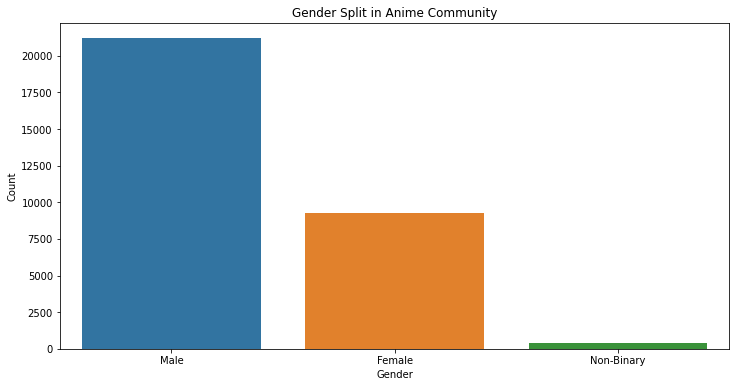

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Gender Split in Anime Community')
sns.barplot(x = 'Gender', y = 'Count', data=gender_split);

In [ ]:
rating_split = pd.DataFrame(df3.score.value_counts())
rating_split.reset_index(level=0,inplace=True)
rating_split.columns = ['rating','Count']
rating_split.head(20)

,rating,Count
0,9,24543
1,10,24518
2,8,23727
3,7,19064
4,6,12446
5,5,8548
6,4,5880
7,3,5726
8,2,3149
9,1,2916


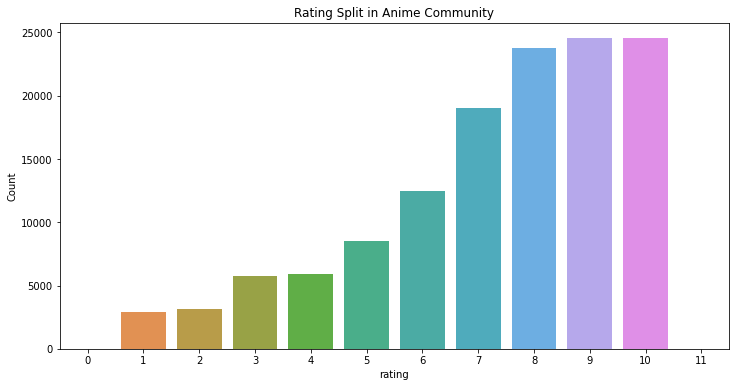

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Rating Split in Anime Community')
sns.barplot(x = 'rating', y = 'Count', data=rating_split);

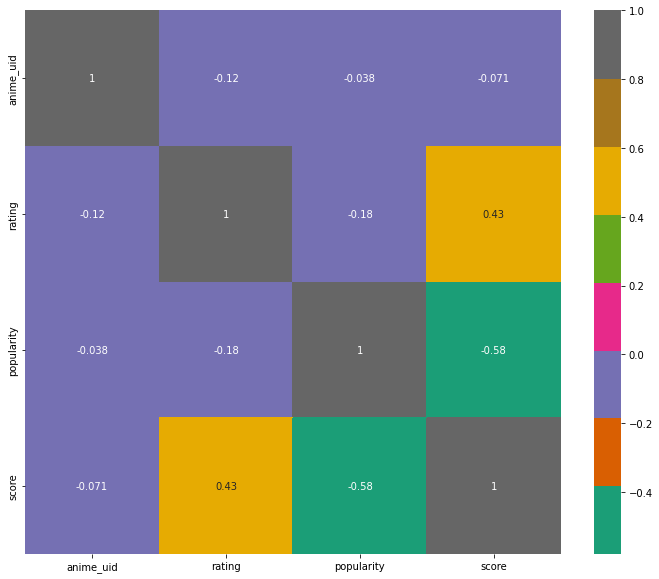

In [ ]:
df1 = df1.rename(columns={'uid': 'anime_uid'})
anime_df = pd.merge(df3, df1, on='anime_uid')
columns = ['synopsis', 'aired', 'episodes','uid','members','scores','ranked', 'img_url','link_x','text','link_y']
anime_df = anime_df.rename(columns={'score_x' :'rating' , 'score_y' : 'score'})
anime_df['rating'] = anime_df["rating"].values.astype(np.float32)
anime_df = anime_df.drop(columns, axis=1)
anime_df.head(20)

plt.figure(figsize=(12,10))
cor =anime_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Dark2)
plt.show()

# Preparing Data

In [ ]:
df1 = df1.rename(columns={'uid': 'anime_uid'})
anime_rating = pd.merge(df3, df1, on='anime_uid')
columns = ['synopsis', 'aired', 'episodes','uid','scores','members','popularity', 'img_url','link_x','text','ranked','link_y']
anime_rating = anime_rating.rename(columns={'score_x' :'rating' , 'score_y' : 'score'})
anime_rating['rating'] = anime_rating["rating"].values.astype(np.float32)
anime_rating = anime_rating.drop(columns, axis=1)
anime_rating.head(20)

,profile,anime_uid,rating,title,genre,score
0,DesolatePsyche,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94
1,claudinou,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94
2,PeterFromRussia,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94
3,TheGostoso,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94
4,Theliel,34096,7.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94
5,Injenss,34096,7.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94
6,DavidTamir,34096,9.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94
7,kokuborou,34096,10.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94
8,agendator,34096,4.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94
9,ilovendut,34096,10.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94


In [ ]:
conditions = [(anime_rating['rating'] <= 4) , (anime_rating['rating'] > 4)]
values = [0,1]
anime_rating['target'] = np.select(conditions, values)
anime_rating.head(10)

,profile,anime_uid,rating,title,genre,score,target
0,DesolatePsyche,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1
1,claudinou,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1
2,PeterFromRussia,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1
3,TheGostoso,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1
4,Theliel,34096,7.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1
5,Injenss,34096,7.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1
6,DavidTamir,34096,9.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1
7,kokuborou,34096,10.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1
8,agendator,34096,4.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,0
9,ilovendut,34096,10.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1


- Tranform 

In [ ]:
user_ids = anime_rating["profile"].unique().tolist()
user_ids.sort()
encodedUsertoUser = {x: i for i, x in enumerate(user_ids)}
anime_ids = anime_rating["anime_uid"].unique().tolist()
#encodedAnimetoAnime = {x: i for i, x in enumerate(anime_ids)}
anime_rating["user"] = anime_rating["profile"].map(encodedUsertoUser)
#anime_rating["anime"] = anime_rating["anime_uid"].map(encodedAnimetoAnime)


In [ ]:
anime_rating.head(100)

,profile,anime_uid,rating,title,genre,score,target,user
0,DesolatePsyche,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1,6837
1,claudinou,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1,33673
2,PeterFromRussia,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1,20650
3,TheGostoso,34096,8.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1,27090
4,Theliel,34096,7.0,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...",8.94,1,27458
...,...,...,...,...,...,...,...,...
95,Rulerofpie,34599,9.0,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...",8.83,1,22903
96,Anomanderake,34599,9.0,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...",8.83,1,2182
97,silverkoibito,34599,9.0,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...",8.83,1,44435
98,Gabrielarcha,34599,10.0,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...",8.83,1,9533


In [ ]:
encoder = LabelEncoder()
genreLabel = encoder.fit_transform(anime_rating['genre'])
mapGenre = {x: i for i, x in enumerate(encoder.classes_) }
anime_rating['genreLabel'] = genreLabel

In [ ]:
feature = anime_rating[['anime_uid', 'score', 'user','genreLabel']]
label = anime_rating['target']
X_train, X_test, y_train, y_test = train_test_split(feature,label,test_size=0.2,random_state=42)

In [ ]:
# validation 
# X_val , X_test , y_val , y_test = train_test_split(X_test,y_test,test_size=0.3, random_state=42)

In [ ]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature:  anime_uid 	Score: 0.09179
Feature:  score 	Score: 0.16597
Feature:  user 	Score: 0.65757
Feature:  genreLabel 	Score: 0.08467


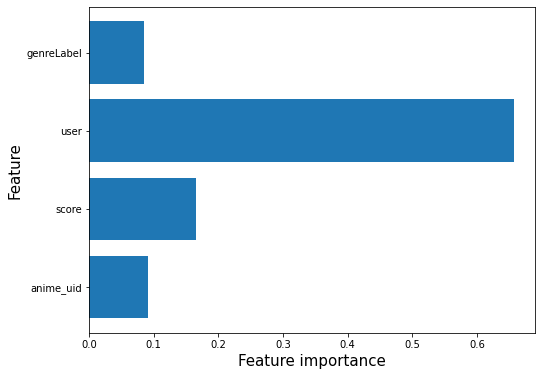

In [ ]:
importance = forest.feature_importances_
for i,v in zip(feature.columns , importance):
	print('Feature: ',i, '\tScore: %.5f' % (v))
fig = plt.figure(figsize=(8, 6))
plt.barh([x for x in range(len(importance))], importance)
plt.yticks([x for x in range(len(importance))],feature.columns,fontsize = '10') 
plt.xticks(fontsize = '10')
plt.xlabel("Feature importance",fontsize = '15')
plt.ylabel("Feature",fontsize = '15')
plt.show()

# Algorithm  RandomForest

In [ ]:
forest = RandomForestClassifier(n_estimators=100,random_state=42)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.824


In [ ]:
def print_results(results):
  print('BEST PARAMS: {}' .format(results.best_params_))
  print('BEST cross-validation score: {:.2f}\n' .format(results.best_score_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds,results.cv_results_['params']):
    print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3),params))

In [ ]:
rf = RandomForestClassifier(random_state = 42)
parameters = {'n_estimators': [50,100],'max_depth': [10,20,None]}
rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(X_train, y_train.values.ravel())
print_results(rf_cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}
BEST cross-validation score: 0.87

0.87 (+/-0.001) for {'max_depth': 10, 'n_estimators': 50}
0.87 (+/-0.001) for {'max_depth': 10, 'n_estimators': 100}
0.857 (+/-0.003) for {'max_depth': 20, 'n_estimators': 50}
0.857 (+/-0.003) for {'max_depth': 20, 'n_estimators': 100}
0.824 (+/-0.003) for {'max_depth': None, 'n_estimators': 50}
0.824 (+/-0.003) for {'max_depth': None, 'n_estimators': 100}


In [ ]:
forest = RandomForestClassifier(n_estimators=100,max_depth= 10,random_state=42)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.873


# MLP

In [ ]:
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy on training set: 0.865
Accuracy on test set: 0.869


In [ ]:
nn = MLPClassifier(random_state = 42)
parameters = {'hidden_layer_sizes' : [(10,),(50,)],'alpha' : [(1.000),(0.100),(0.010)]}
nn_cv = GridSearchCV(nn, parameters, cv=5)
nn_cv.fit(X_train, y_train.values.ravel())
print_results(nn_cv)

BEST PARAMS: {'alpha': 0.01, 'hidden_layer_sizes': (50,)}
BEST cross-validation score: 0.85

0.785 (+/-0.2) for {'alpha': 1.0, 'hidden_layer_sizes': (10,)}
0.714 (+/-0.332) for {'alpha': 1.0, 'hidden_layer_sizes': (50,)}
0.781 (+/-0.155) for {'alpha': 0.1, 'hidden_layer_sizes': (10,)}
0.709 (+/-0.336) for {'alpha': 0.1, 'hidden_layer_sizes': (50,)}
0.773 (+/-0.219) for {'alpha': 0.01, 'hidden_layer_sizes': (10,)}
0.853 (+/-0.044) for {'alpha': 0.01, 'hidden_layer_sizes': (50,)}


In [ ]:
mlp = MLPClassifier(alpha = 0.01, random_state = 42,hidden_layer_sizes=[50,50])
mlp.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.864
Accuracy on test set: 0.868


In [ ]:
pred_rf = forest.predict(X_test)
print('Test score {:.3f}'.format(forest.score(X_test,y_test)))
print('f1 score Random Forest {:.3f}'.format(f1_score(y_test,pred_rf)))
print('\nRandom Forest')
print(confusion_matrix(y_test,pred_rf))
print()
print(classification_report(y_test,pred_rf,target_names=['not like' , 'like']))

Test score 0.873
f1 score Random Forest 0.931

Random Forest
[[  360  3127]
 [  218 22669]]

              precision    recall  f1-score   support

    not like       0.62      0.10      0.18      3487
        like       0.88      0.99      0.93     22887

    accuracy                           0.87     26374
   macro avg       0.75      0.55      0.55     26374
weighted avg       0.84      0.87      0.83     26374



In [ ]:
pred_mlp = mlp.predict(X_test)
print('Test score {:.3f}'.format(mlp.score(X_test,y_test)))
print('f1 score Random Forest {:.3f}'.format(f1_score(y_test,pred_mlp)))
print('\nNeural network')
print(confusion_matrix(y_test,pred_mlp))
print()
print(classification_report(y_test,pred_mlp,target_names=['not like' , 'like']))

Test score 0.868
f1 score Random Forest 0.929

Neural network
[[    0  3487]
 [    0 22887]]

              precision    recall  f1-score   support

    not like       0.00      0.00      0.00      3487
        like       0.87      1.00      0.93     22887

    accuracy                           0.87     26374
   macro avg       0.43      0.50      0.46     26374
weighted avg       0.75      0.87      0.81     26374



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Recommended base on Title and genre**

In [ ]:
anime = pd.DataFrame({'title' : df1['title'], 'genre' : df1['genre']})

In [ ]:
anime.head()

,title,genre
0,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun..."
1,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun..."
2,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F..."
3,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ..."
4,Kizumonogatari III: Reiketsu-hen,"['Action', 'Mystery', 'Supernatural', 'Vampire']"


In [ ]:
vec = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
X_title = vec.fit_transform(anime['title'])
X_genre = vec.fit_transform(anime['genre'])
print(X_title.shape)
print(X_genre.shape)

(16368, 43915)
(16368, 971)


In [ ]:
cosine_genre = cosine_similarity(X_genre, X_genre)
cosine_title = cosine_similarity(X_title, X_title)

In [ ]:
def recommendations(title , cosine):
    index = pd.Series(anime.index, index=anime['title'])
    idx = index[title]
    score = list(enumerate(cosine[idx]))
    score  = sorted(score , key=lambda x: x[1], reverse=True)
    score  = score [1:]
    print('Recommended anime to' , title , ':')
    j=0
    for i in score:
      anime_index = anime[anime.index == i[0]]['title'].values[0]
      print(j+1 , anime_index)
      j = j+1
      if j > 14:
        break
    return

In [ ]:
recommendations('Haikyuu!!',cosine_genre)

Recommended anime to Haikyuu!! :
1 Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou
2 Haikyuu!! Movie 2: Shousha to Haisha
3 Haikyuu!! Movie 1: Owari to Hajimari
4 Slam Dunk
5 Haikyuu!!
6 Haikyuu!!: To the Top
7 Haikyuu!!: Riku vs. Kuu
8 Tasogare Otome x Amnesia: Taima Otome
9 Overlord: Ple Ple Pleiades - Nazarick Saidai no Kiki
10 UN-GO: Inga-ron
11 Maison Ikkoku: Shiki Utsuriyuku Kisetsu no Naka de
12 Oushitsu Kyoushi Heine
13 Tennis no Ouji-sama Movie 2: Eikokushiki Teikyuu Shiro Kessen!
14 Tales of Phantasia The Animation
15 Free!: Eternal Summer


In [ ]:
recommendations('Haikyuu!!',cosine_title)

Recommended anime to Haikyuu!! :
1 Haikyuu!!: To the Top
2 Haikyuu!! (OVA)
3 Haikyuu!!: To the Top 2nd Season
4 Haikyuu!! Second Season
5 Pâtisserie no Monster
6 gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?
7 Haikyuu!!: Lev Genzan!
8 Haikyuu!! Movie 1: Owari to Hajimari
9 Haikyuu!! Movie 4: Concept no Tatakai
10 Haikyuu!! Movie 2: Shousha to Haisha
11 Haikyuu!! Movie 3: Sainou to Sense
12 Haikyuu!!: Riku vs. Kuu
13 Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou
14 Oshiri Kajiri Mushi (TV) 2nd Season
15 Shigatsu wa Kimi no Uso


# **Collaborative Filtering**

In [ ]:
# พยายามจะทำเป็น pivot table แต่ RAM ไม่เพียงพอ 
# anime = anime_rating.pivot(index='title',columns='userID',values='score').fillna(0,inreplece = True)
# anime = pd.crosstab(anime_rating['title'],anime_rating['userID'])

In [ ]:
anime_ids = anime_rating["anime_uid"].unique().tolist()
encodedAnimetoAnime = {x: i for i, x in enumerate(anime_ids)}
anime_rating["Anime"] = anime_rating["anime_uid"].map(encodedAnimetoAnime)

In [ ]:
num_users = len(encodedUsertoUser)
num_anime = len(anime_ids)
min_rating = min(anime_rating['rating'])
max_rating = max(anime_rating['rating'])


In [ ]:
anime_rating = anime_rating.sample(frac=1, random_state=42)
x = anime_rating[['user','Anime']].values
y = anime_rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
train_indices = int(0.8 * anime_rating.shape[0])
X_train, X_test, y_train, y_test = (x[:train_indices],x[train_indices:],y[:train_indices],y[train_indices:])

In [ ]:
EMBEDDING_SIZE = 50
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_anime, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_anime = num_anime
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(num_users,embedding_size,embeddings_initializer="he_normal",embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.anime_embedding = layers.Embedding(num_anime,embedding_size,embeddings_initializer="he_normal", embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.anime_bias = layers.Embedding(num_anime, 1)
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        anime_vector = self.anime_embedding(inputs[:, 1])
        anime_bias = self.anime_bias(inputs[:, 1])
        dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)
        x = dot_user_anime + user_bias + anime_bias
        return tf.nn.sigmoid(x)

In [ ]:
model = RecommenderNet(num_users, num_anime, EMBEDDING_SIZE)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x=X_train,y=y_train,batch_size=100,epochs=4,verbose=1,validation_data=(X_test, y_test),)

Epoch 1/4
1055/1055 [==============================] - 35s 32ms/step - loss: 0.6512 - val_loss: 0.6298
Epoch 2/4
1055/1055 [==============================] - 34s 33ms/step - loss: 0.6244 - val_loss: 0.6425
Epoch 3/4
1055/1055 [==============================] - 34s 32ms/step - loss: 0.6194 - val_loss: 0.6381
Epoch 4/4
1055/1055 [==============================] - 34s 32ms/step - loss: 0.6246 - val_loss: 0.6474


In [ ]:
animetitle = pd.DataFrame({'anime_uid' : df1['anime_uid'] ,'title' : df1['title'], 'genre' : df1['genre']})
animetitle.head()

,anime_uid,title,genre
0,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun..."
1,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun..."
2,34599,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F..."
3,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ..."
4,31758,Kizumonogatari III: Reiketsu-hen,"['Action', 'Mystery', 'Supernatural', 'Vampire']"


In [ ]:
# พยายามจะลองรับค่าของ user id แต่เนื่องจาก userID ใน anime_rating ไม่ได้เรียงลำดับตั้งแต่แรก จึงยากต่อการนำไปใช้ต่อ
# user_id = anime_rating.userID.iloc[0]
# userid = int(input('Enter your user id '))
# user_id = anime_rating.userID.iloc[userid]
# user_id = anime_rating.userID.iloc[0]
user_id = anime_rating.profile.sample(1).iloc[0]
animeEncodedToAnime = {i: x for i, x in enumerate(anime_ids)}
watchListByUser = anime_rating[anime_rating.profile == user_id]
animeNotWatched = animetitle[~animetitle['anime_uid'].isin(watchListByUser.anime_uid.values)]['anime_uid']
animeNotWatched = list(set(animeNotWatched).intersection(set(encodedAnimetoAnime.keys())))
animeNotWatched = [[encodedAnimetoAnime.get(x)] for x in animeNotWatched]
userEncoder = encodedUsertoUser.get(user_id)
userAnimeArray = np.hstack(([[userEncoder]] * len(animeNotWatched), animeNotWatched))
ratings = model.predict(userAnimeArray).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommendedAnimeids = [animeEncodedToAnime.get(animeNotWatched[x][0]) for x in top_ratings_indices]

In [ ]:
print("Recommendations Anime for user: {}".format(user_id))
print("====" * 20)
print("   Animes with high ratings from user")
topAnime = (watchListByUser.sort_values(by="rating", ascending=False).head(5).anime_uid.values)
Animerows = animetitle[animetitle["anime_uid"].isin(topAnime)]
i = 0
for row in Animerows.itertuples():
    print('\t', i+1,row.title, ":", row.genre)
    i = i + 1
    if(i>5):
      break
print("   Top 10 anime recommendations")
recommendedAnime = animetitle[animetitle["anime_uid"].isin(recommendedAnimeids)]
i = 0
for row in recommendedAnime.itertuples():
    print('\t',i+1 ,row.title, ":", row.genre)
    i = i + 1
    if(i>11):
      break

Recommendations Anime for user: Lily77
   Animes with high ratings from user
	 1 Tsumiki no Ie : ['Drama']
	 2 Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. : ['Slice of Life', 'Supernatural', 'Drama']
	 3 Vampire Holmes : ['Mystery', 'Comedy', 'Supernatural']
	 4 Kuzu no Honkai : ['Drama', 'Romance', 'School', 'Seinen']
   Top 10 anime recommendations
	 1 Fullmetal Alchemist: Brotherhood : ['Action', 'Military', 'Adventure', 'Comedy', 'Drama', 'Magic', 'Fantasy', 'Shounen']
	 2 Clannad: After Story : ['Slice of Life', 'Comedy', 'Supernatural', 'Drama', 'Romance']
	 3 Mahou Shoujo Madoka★Magica : ['Psychological', 'Drama', 'Magic', 'Thriller']
	 4 Usagi Drop : ['Josei', 'Slice of Life']
	 5 Haikyuu!! : ['Comedy', 'Sports', 'Drama', 'School', 'Shounen']
	 6 Suzumiya Haruhi no Shoushitsu : ['Comedy', 'Mystery', 'Romance', 'School', 'Sci-Fi', 'Supernatural']
	 7 Death Note : ['Mystery', 'Police', 'Psychological', 'Supernatural', 'Thriller', 'Shounen']
	 8 Hajime no Ippo : ['Com